In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [36]:
df = pd.read_csv("cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
df.drop(columns="id", inplace=True)

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave_points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave_points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

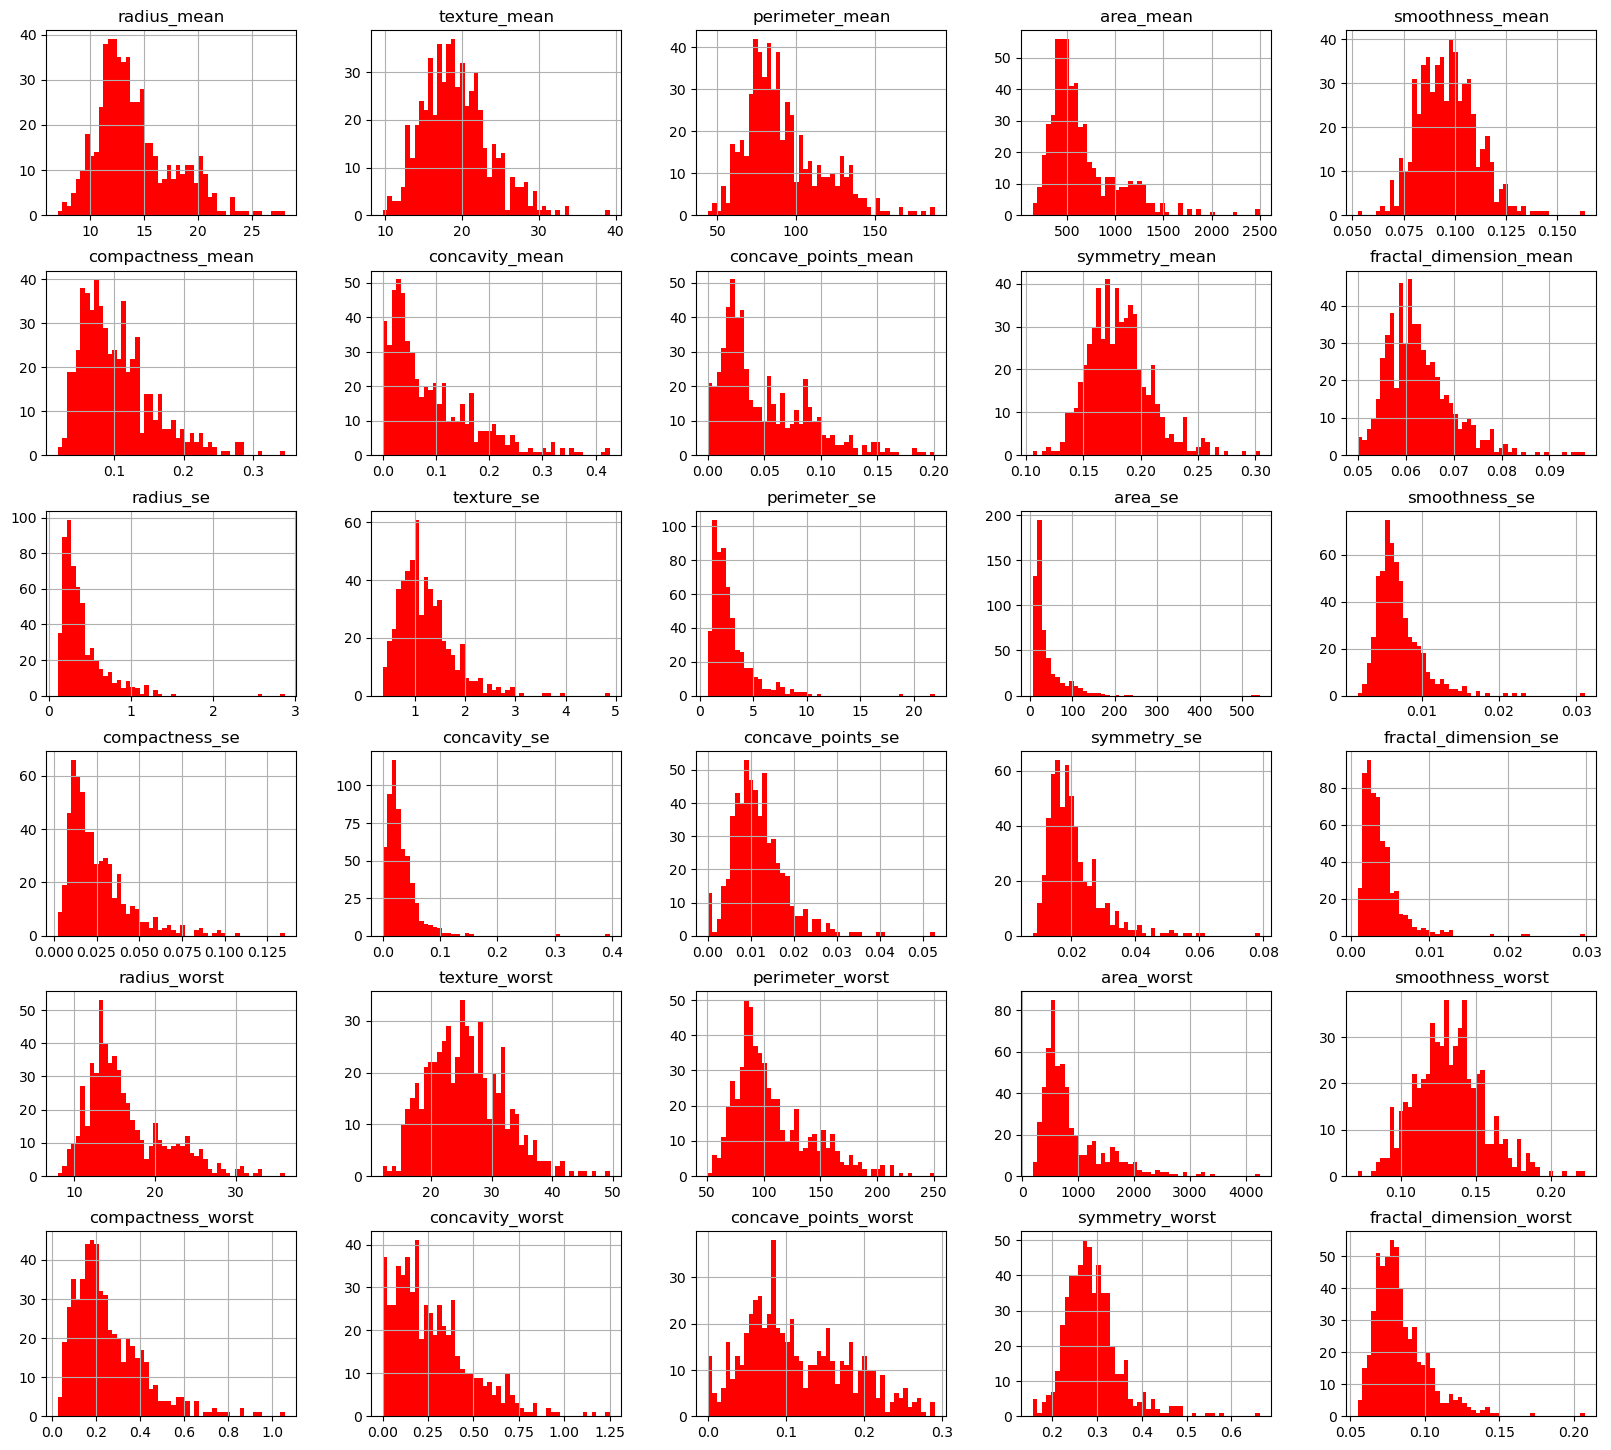

In [38]:
df.hist(bins=50, figsize=(20, 18), color="red")

In [39]:
def outlier(data):
    columns = df.select_dtypes(include=['int', 'float']).columns
    outlier_counts = {}
    for x in columns:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75) 
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
        outlier_counts[x] = len(outliers)
        
    return outlier_counts


outlier_counts = outlier(df)
print(f"jumlah data outlier : {outlier_counts}")

jumlah data outlier : {'radius_mean': 14, 'texture_mean': 7, 'perimeter_mean': 13, 'area_mean': 25, 'smoothness_mean': 6, 'compactness_mean': 16, 'concavity_mean': 18, 'concave_points_mean': 10, 'symmetry_mean': 15, 'fractal_dimension_mean': 15, 'radius_se': 38, 'texture_se': 20, 'perimeter_se': 38, 'area_se': 65, 'smoothness_se': 30, 'compactness_se': 28, 'concavity_se': 22, 'concave_points_se': 19, 'symmetry_se': 27, 'fractal_dimension_se': 28, 'radius_worst': 17, 'texture_worst': 5, 'perimeter_worst': 15, 'area_worst': 35, 'smoothness_worst': 7, 'compactness_worst': 16, 'concavity_worst': 12, 'concave_points_worst': 0, 'symmetry_worst': 23, 'fractal_dimension_worst': 24}


In [40]:
def remove_outlier(data):
    columns = df.select_dtypes(include=['int', 'float']).columns
    cleaned_data = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75) 
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
        
    return cleaned_data


df_cleaned = remove_outlier(df)

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave_points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave_points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

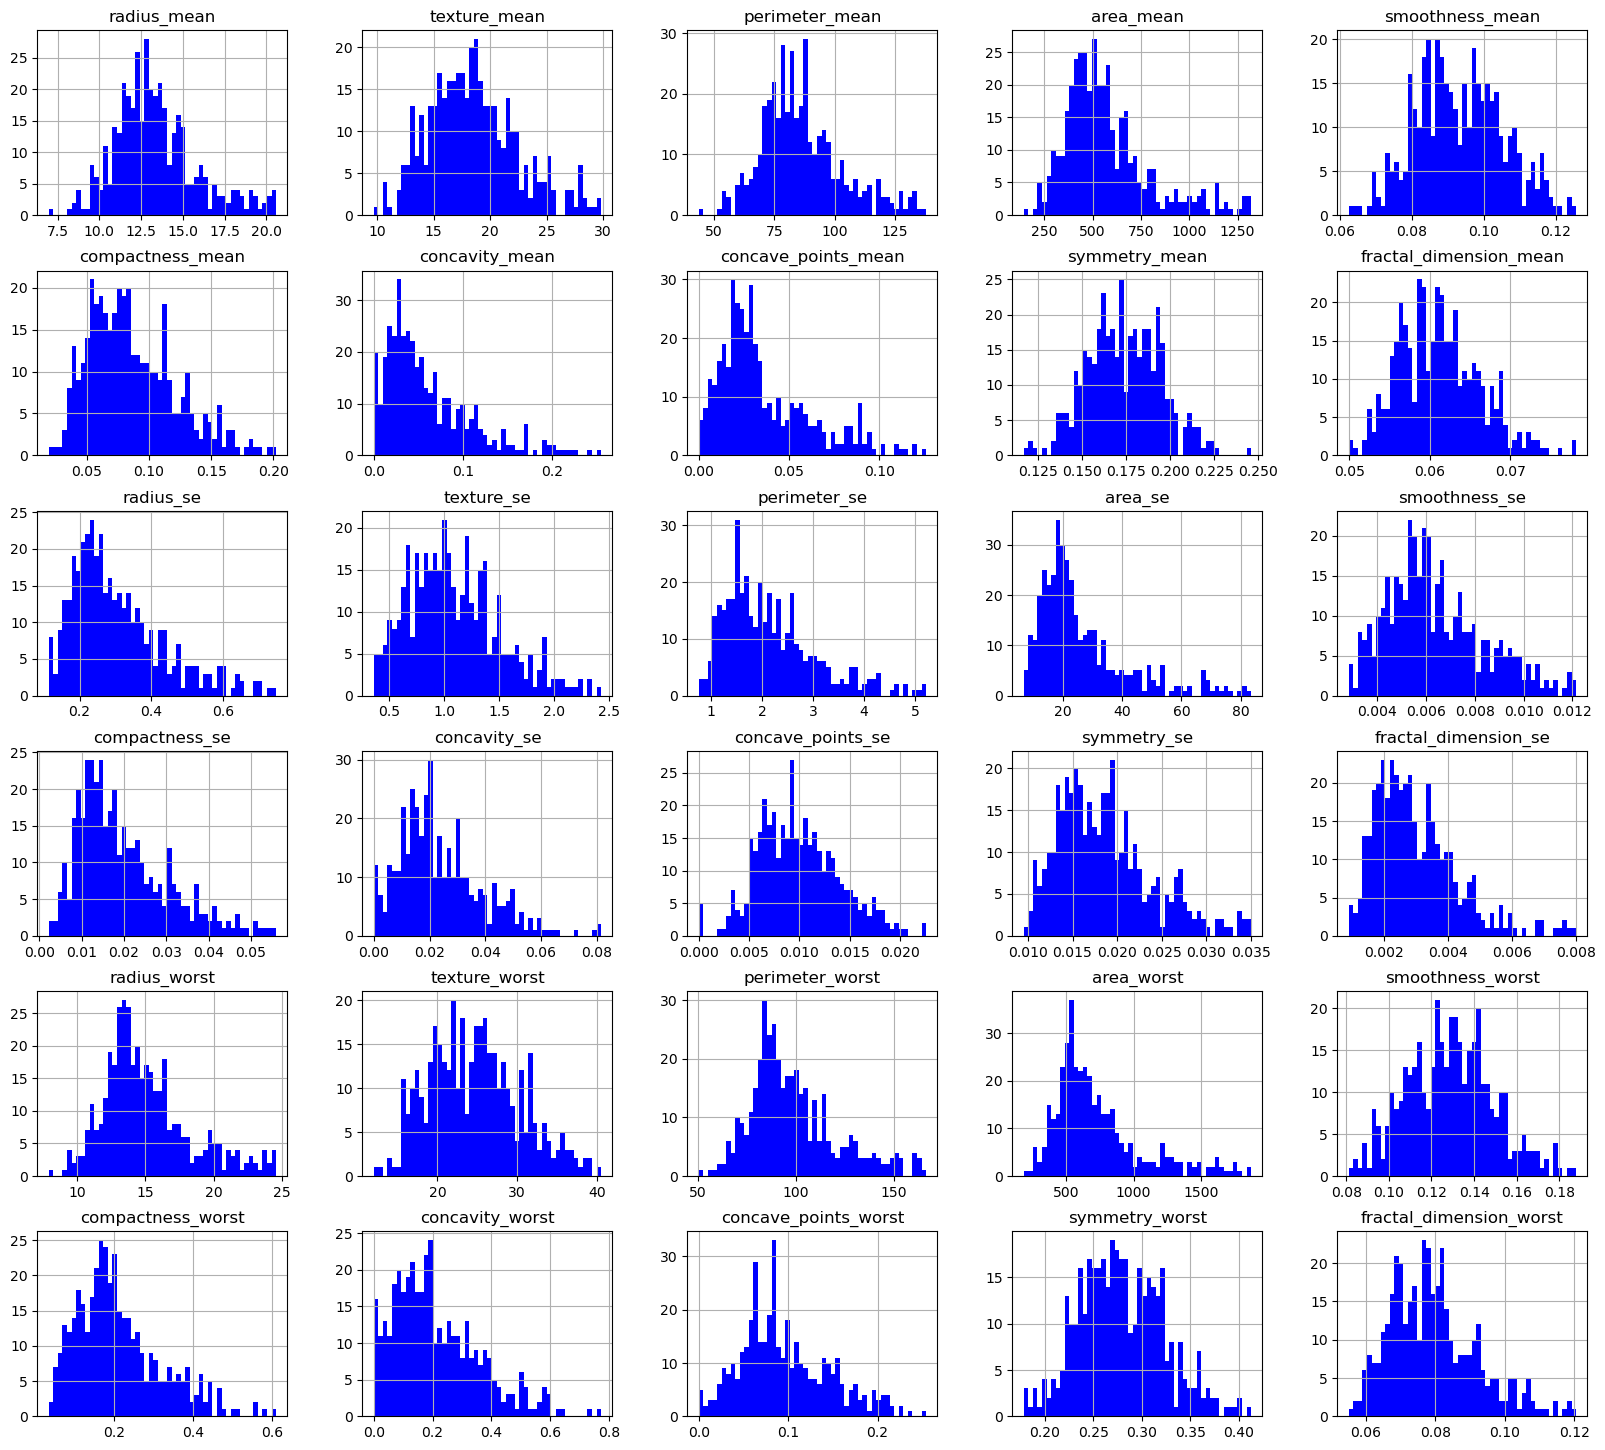

In [42]:
df_cleaned.hist(bins=50, figsize=(20, 18), color="blue")

In [43]:
df_numeric = df.select_dtypes(include=[np.number])

<Axes: title={'center': 'correlation between variable'}>

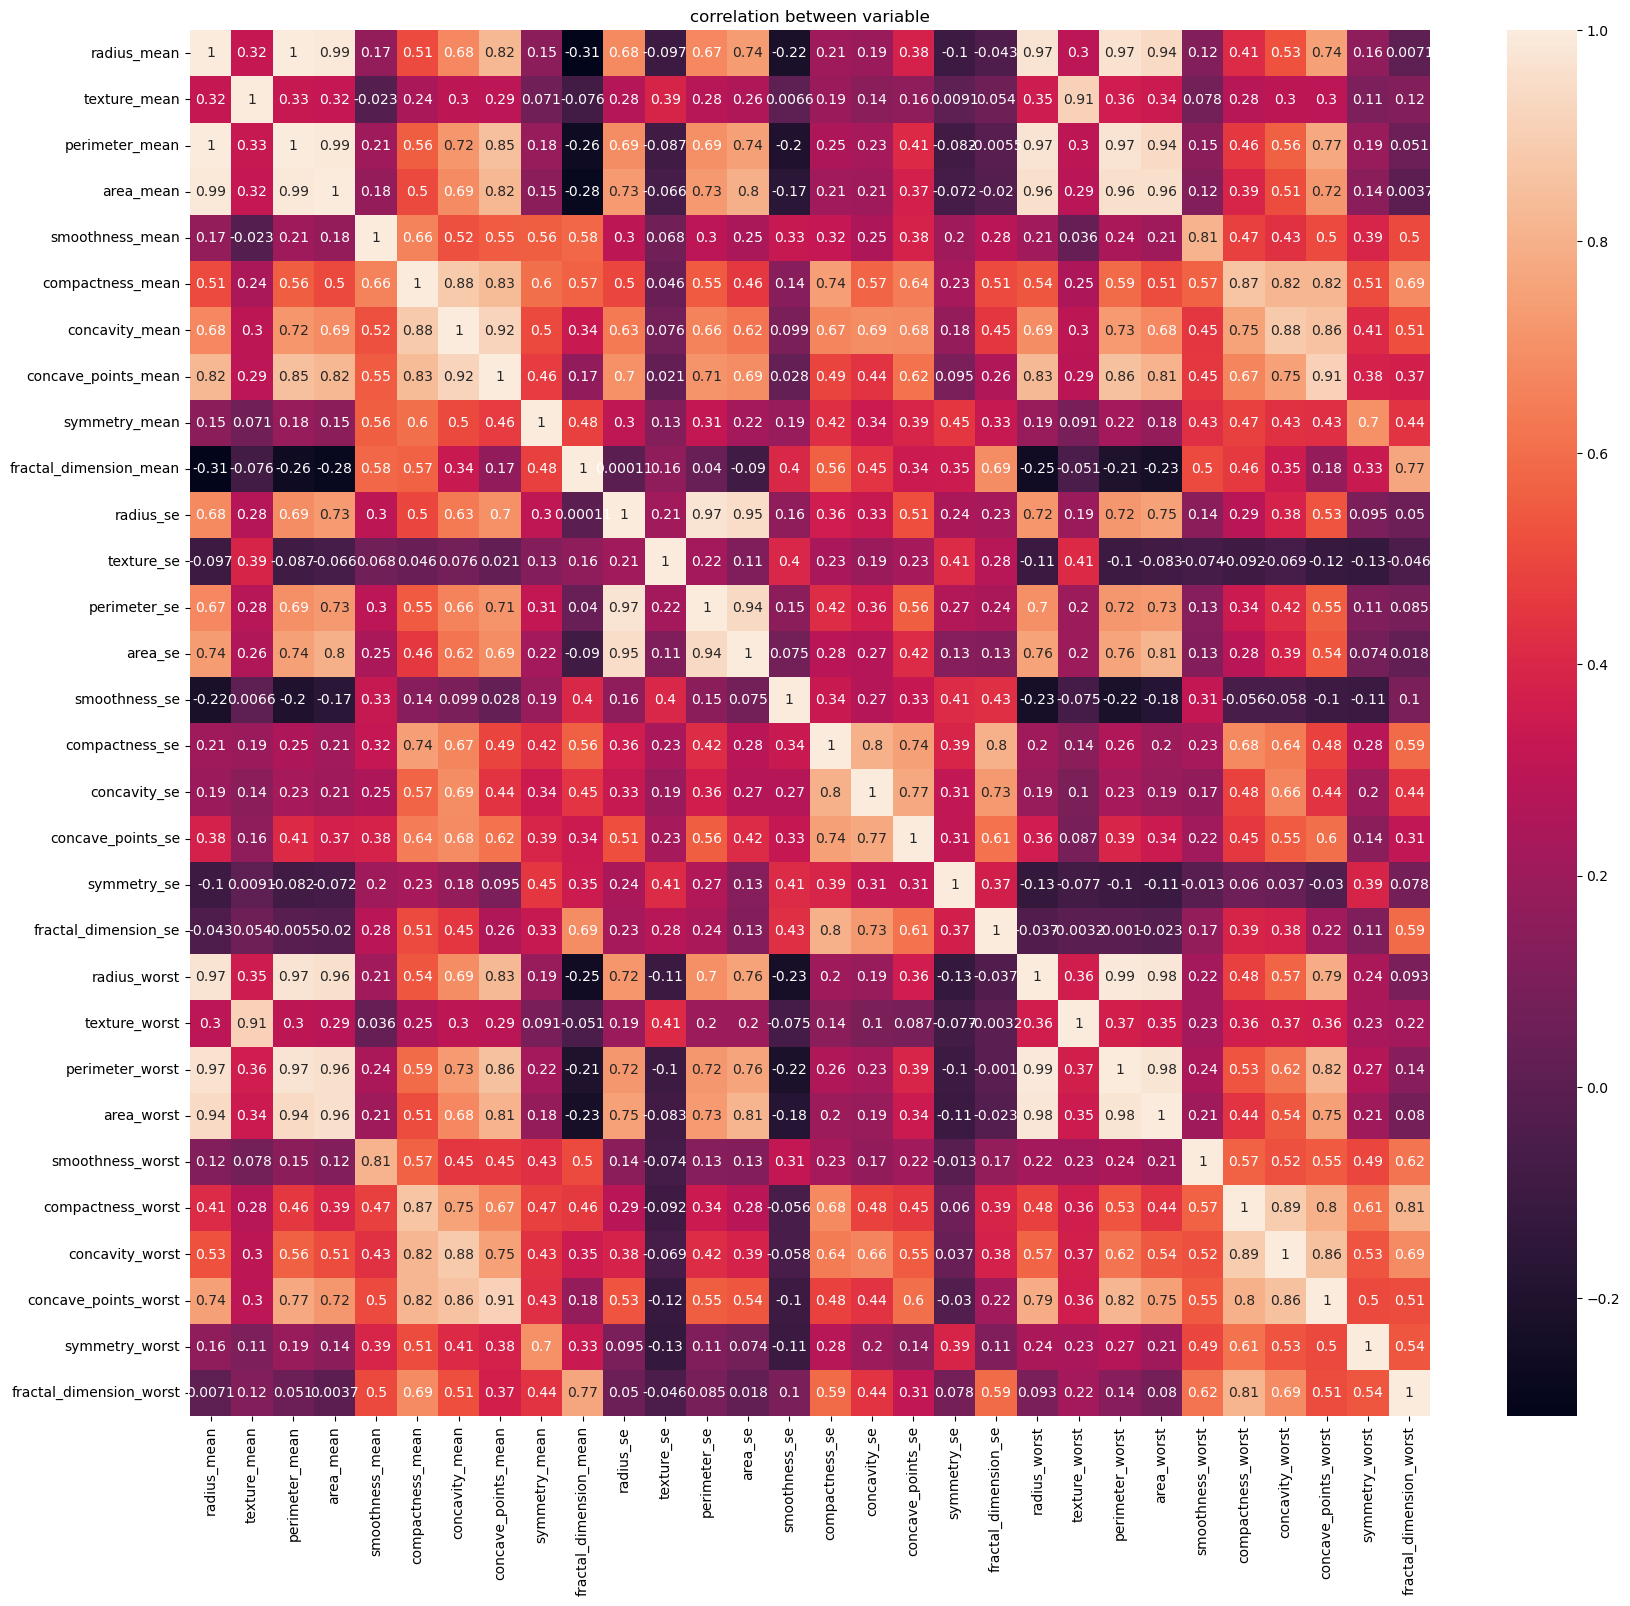

In [44]:
plt.figure(figsize=(20,18))
plt.title("correlation between variable")
sns.heatmap(data=df_numeric.corr(), annot=True)

<Axes: xlabel='diagnosis', ylabel='count'>

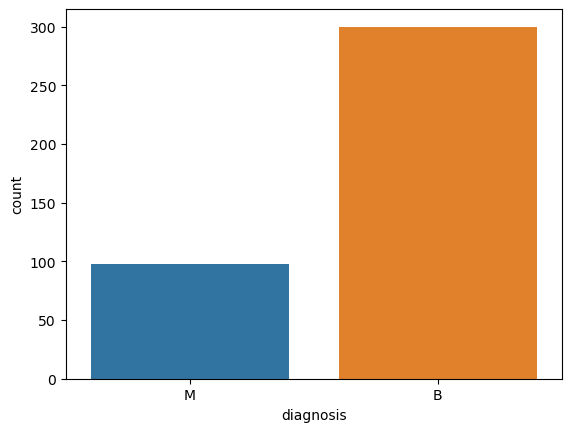

In [45]:
sns.countplot(x="diagnosis", data=df_cleaned)

In [46]:
le = LabelEncoder()
df_cleaned["diagnosis"] = le.fit_transform(df_cleaned["diagnosis"])

In [48]:
x = df_cleaned.drop(columns="diagnosis")
y = df_cleaned["diagnosis"]

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [50]:
(x_train.shape[0]/len(x))*100, (x_test.shape[0]/len(x))*100

(79.89949748743719, 20.100502512562816)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [53]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [54]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
301,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,13.46,23.07,88.13,551.3,0.1050,0.2158,0.19040,0.07625,0.2685,0.07764
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,0.1944,0.05913,...,16.76,31.55,110.20,867.1,0.1077,0.3345,0.31140,0.13080,0.3163,0.09251
279,13.850,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,0.2110,0.05853,...,14.98,21.74,98.37,670.0,0.1185,0.1724,0.14560,0.09993,0.2955,0.06912
103,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,...,10.76,26.83,72.22,361.2,0.1559,0.2302,0.26440,0.09749,0.2622,0.08490
380,11.270,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,0.06914,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
40,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,15.93,30.25,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146
142,11.430,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,0.1645,0.06562,...,12.78,26.76,82.66,503.0,0.1413,0.1792,0.07708,0.06402,0.2584,0.08096
264,17.190,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,...,21.58,29.33,140.50,1436.0,0.1558,0.2567,0.38890,0.19840,0.3216,0.07570


In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [60]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))

[[61  3]
 [ 2 14]]
0.9375
0.875
0.8235294117647058


<Axes: >

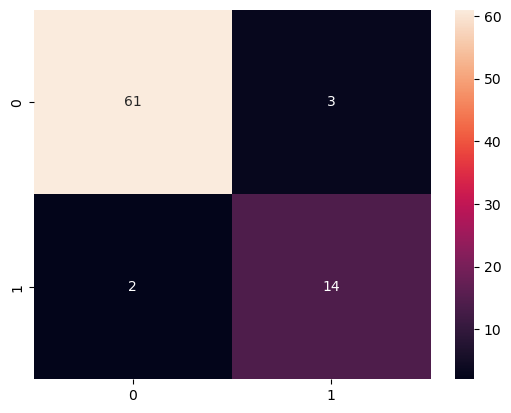

In [57]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')

In [58]:
print(confusion_matrix(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))

[[64  0]
 [ 3 13]]
0.9625
0.8125
1.0


In [59]:
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

[[61  3]
 [ 1 15]]
0.95
0.9375
0.8333333333333334


In [61]:
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(recall_score(y_test, y_pred_nb))
print(precision_score(y_test, y_pred_nb))

[[58  6]
 [ 2 14]]
0.9
0.875
0.7
